In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### APERTURA DE ARCHIVOS

In [106]:
books = pd.read_csv(r".\Input\books.csv")
books_tags = pd.read_csv(r".\Input\book_tags.csv")
ratings = pd.read_csv(r".\Input\ratings.csv") # Usuarios que calificaron libros
tags = pd.read_csv(r".\Input\tags.csv")
to_read = pd.read_csv(r".\Input\to_read.csv") # Usuarios que marcaron libros como "quiero leer" (DESCARTADO PARA EL MODELO)


### Preguntas útiles para orientarse:

- ¿Cuántos libros hay? ¿Cuántos usuarios?

- ¿Cómo están distribuidos los ratings?

- ¿Hay libros con muchísimas o poquísimas puntuaciones?

- ¿Qué autores aparecen más?



In [107]:
# 📊 Análisis general de usuarios y libros

cantidad_libros = books["book_id"].nunique()
usuarios_to_read = to_read["user_id"].nunique()
usuarios_en_ratings = ratings["user_id"].nunique()

print(f"Cantidad total de libros: {cantidad_libros}")
print(f"Usuarios únicos que marcaron libros como 'para leer': {usuarios_to_read}")
print(f"Usuarios únicos que calificaron libros: {usuarios_en_ratings}")

# 🔍 Interpretación
print("\nInterpretación:")
if usuarios_en_ratings > usuarios_to_read:
    print("Hay más usuarios que calificaron libros que los que usan la función 'to read'.")
else:
    print("Hay más usuarios que marcaron libros como 'to read' que los que calificaron.")

print("Esto es esperable, ya que no todos los usuarios usan todas las funciones de la plataforma.")
print("Para construir un sistema de recomendación basado en ratings, trabajaremos principalmente con el dataset ratings.csv.")


Cantidad total de libros: 10000
Usuarios únicos que marcaron libros como 'para leer': 48871
Usuarios únicos que calificaron libros: 53424

Interpretación:
Hay más usuarios que calificaron libros que los que usan la función 'to read'.
Esto es esperable, ya que no todos los usuarios usan todas las funciones de la plataforma.
Para construir un sistema de recomendación basado en ratings, trabajaremos principalmente con el dataset ratings.csv.


##### ¿Cómo están distribuidos los ratings?

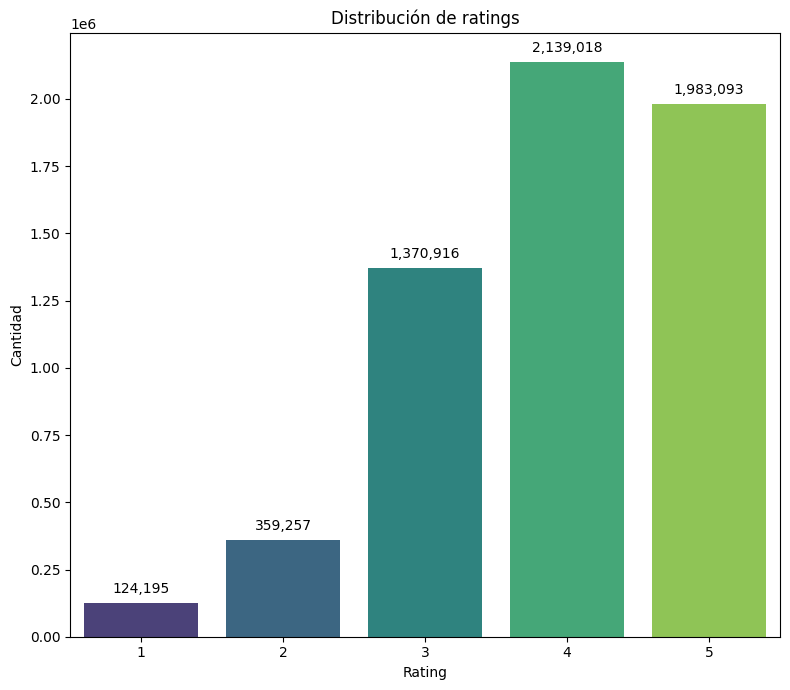

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,7))
ax = sns.countplot(data=ratings, x="rating", palette="viridis")

# Agregar los valores encima de las barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.0f}',  # número entero con separador de miles
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title("Distribución de ratings")
plt.xlabel("Rating")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()


## TOP 10 de libros mas populares

In [109]:
top_books = ratings.groupby("book_id").size().sort_values(ascending=False).head(10)
books[books['book_id'].isin(top_books.index)][["title", "authors"]]


,title,authors
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins
1,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré"
2,"Twilight (Twilight, #1)",Stephenie Meyer
3,To Kill a Mockingbird,Harper Lee
4,The Great Gatsby,F. Scott Fitzgerald
6,The Hobbit,J.R.R. Tolkien
16,"Catching Fire (The Hunger Games, #2)",Suzanne Collins
17,Harry Potter and the Prisoner of Azkaban (Harr...,"J.K. Rowling, Mary GrandPré, Rufus Beck"
19,"Mockingjay (The Hunger Games, #3)",Suzanne Collins
22,Harry Potter and the Chamber of Secrets (Harry...,"J.K. Rowling, Mary GrandPré"


## TOP 10 de libros menos populares populares

In [110]:
top_books = ratings.groupby("book_id").size().sort_values(ascending=True).head(10)
books[books['book_id'].isin(top_books.index)][["title", "authors"]]

,title,authors
1934,Kindle Paperwhite User's Guide,Amazon
7802,Kindle User's Guide,Amazon
8180,"The Batman Chronicles, Vol. 1","Bill Finger, Gardner F. Fox, Bob Kane, Jerry R..."
9259,"The Magic (The Secret, #3)",Rhonda Byrne
9314,The King's Agent,Donna Russo Morin
9344,Diary ng Panget,"HaveYouSeenThisGirL, Jan Irene Villar"
9478,Manga Classics: Les Misérables,"Stacy King, SunNeko Lee, Crystal S. Chan, Vict..."
9485,Fifty Shades Duo: Fifty Shades Darker / Fifty ...,E.L. James
9552,"Attack on Titan: No Regrets, Volume 01","Hajime Isayama, Hikaru Suruga, Gan Sunaaku"
9704,The Lake (The Lake Trilogy #1),AnnaLisa Grant


### TOP 10 Autores con mas libros

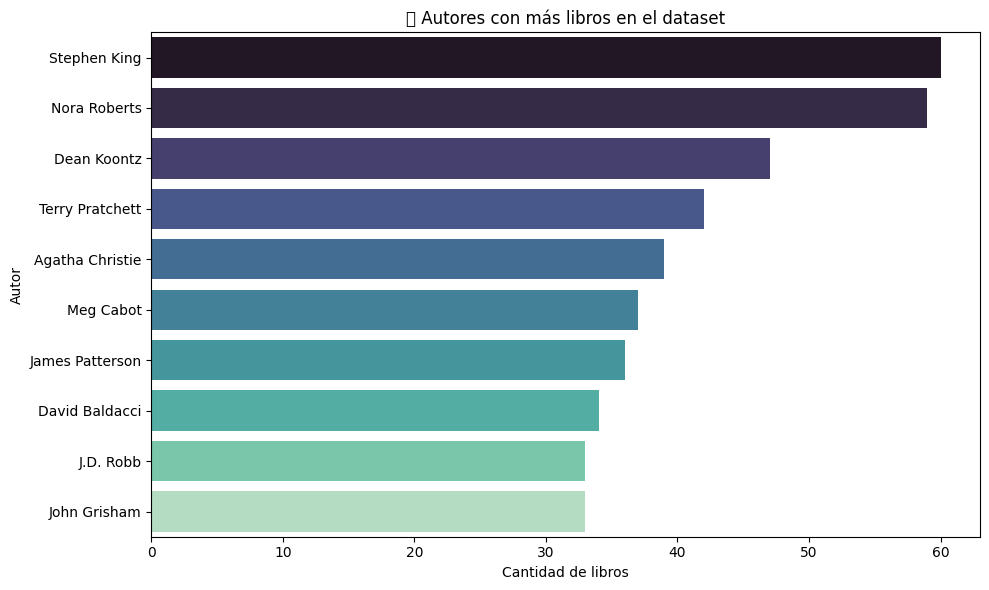

In [113]:
# Top 10 autores con más libros
top_autores = books.groupby("authors").size().sort_values(ascending=False).head(10)
top_autores = top_autores.reset_index()
top_autores.columns = ["Autor", "Cantidad de libros"]

# Gráfico
plt.figure(figsize=(10,6))
# sns.barplot(data=top_autores, x="Cantidad de libros", y="Autor",  palette="mako")
sns.barplot(data=top_autores, x="Cantidad de libros", y="Autor", palette="mako", hue="Autor", legend=False)
plt.title("📚 Autores con más libros en el dataset")
plt.xlabel("Cantidad de libros")
plt.ylabel("Autor")
plt.tight_layout()
plt.show()


### Autores más populares (Según cantidad de puntuaciones)

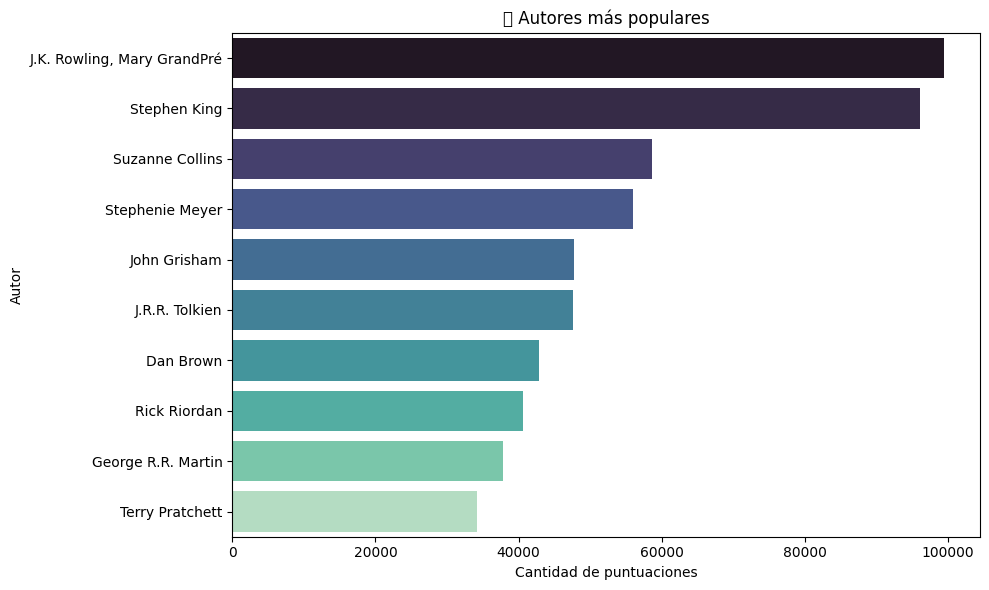

In [127]:
# Unimos ratings con libros
ratings_libros = ratings.merge(books, on="book_id")
# Agrupamos por autor
top_autores_populares = ratings_libros.groupby("authors").size().sort_values(ascending=False).head(10)
top_autores_populares = top_autores_populares.reset_index()
top_autores_populares.columns = ["Autor", "Cantidad de puntuaciones"]

# Gráfico
plt.figure(figsize=(10,6))
# sns.barplot(data=top_autores, x="Cantidad de libros", y="Autor",  palette="mako")
sns.barplot(data=top_autores_populares, x="Cantidad de puntuaciones", y="Autor", palette="mako", hue="Autor", legend=False)
plt.title("📚 Autores más populares")
plt.xlabel("Cantidad de puntuaciones")
plt.ylabel("Autor")
plt.tight_layout()
plt.show()

### ¿Cuáles son los libros con mayor promedio de rating?

In [93]:
promedio_ratings = ratings.groupby("book_id")["rating"].mean()
top_promedio = promedio_ratings.sort_values(ascending=False).head(10)
books[books["book_id"].isin(top_promedio.index)][["title", "authors"]]


,title,authors
1787,The Calvin and Hobbes Tenth Anniversary Book,Bill Watterson
3274,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...","J.K. Rowling, Mary GrandPré"
3627,The Complete Calvin and Hobbes,Bill Watterson
4482,It's a Magical World: A Calvin and Hobbes Coll...,Bill Watterson
6360,There's Treasure Everywhere: A Calvin and Hobb...,Bill Watterson
6589,The Authoritative Calvin and Hobbes: A Calvin ...,Bill Watterson
6919,The Indispensable Calvin and Hobbes,Bill Watterson
7946,ESV Study Bible,"Anonymous, Lane T. Dennis, Wayne A. Grudem"
8977,The Revenge of the Baby-Sat,Bill Watterson
9565,Attack of the Deranged Mutant Killer Monster S...,Bill Watterson


### ¿Cuántos libros tienen una calificación promedio superior a 4.5?

In [95]:
promedio_ratings = ratings.groupby("book_id")["rating"].mean()
libros_top = promedio_ratings[promedio_ratings > 4.5]
print(f"Libros con rating promedio > 4.5: {len(libros_top)}")

Libros con rating promedio > 4.5: 102


### ¿Qué libros tienen el rating promedio más bajo con al menos 50 calificaciones?

In [96]:
rating_stats = ratings.groupby("book_id")["rating"].agg(["mean", "count"])
rating_filtrados = rating_stats[rating_stats["count"] >= 50].sort_values("mean").head(10)
books[books["book_id"].isin(rating_filtrados.index)][["title", "authors"]]


,title,authors
1408,The 3 Mistakes of My Life,Chetan Bhagat
1792,One Night at the Call Center,Chetan Bhagat
1821,"Revolution 2020: Love, Corruption, Ambition",Chetan Bhagat
3549,The Almost Moon,Alice Sebold
4044,Half Girlfriend,Chetan Bhagat
4282,Revenge Wears Prada: The Devil Returns (The De...,Lauren Weisberger
4990,Can Love Happen Twice?,Ravinder Singh
7635,Of Course I Love You...! Till I Find Someone B...,"Durjoy Datta, Maanvi Ahuja"
8465,ليتها تقرأ,خالد الباتلي
9020,Lost,"Gregory Maguire, Douglas Smith"
